In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import string
import re
from tqdm import tqdm
tqdm.pandas()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Workspace/MusicSentiment/spotify_songs.csv')
df

,track_id,track_name,track_artist,LYRICS,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,1/1/01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,11/21/17,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,hard rock,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,1/1/05,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,r&b,new jack swing,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,10/29/12,Christmas Soul,6FZYc2BvF7tColxO8PBShV,r&b,neo soul,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,9/22/19,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,dance pop,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,3/24/14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.479,0.800,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,5qs8T6ZHSrnllnOuUk6muC,The Pinkprint (Deluxe Edition),12/15/14,10er Playlist,1kEczIkZH8IgaWT2BiApxZ,pop,electropop,0.963,0.603,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),7/9/13,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,r&b,neo soul,0.458,0.540,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,14HYMxFhpgDIr9cci1u0kt,I'll Do 4 U (Re-Recorded / Remastered),10/1/10,New Jack Swing/ R&B Hits: 1987 - 2002,4sji14lrB5bgcr51lPALYH,r&b,new jack swing,0.832,0.666,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [ ]:
#lyrics_df=pd.read_csv('/content/drive/MyDrive/MLProj/combine.csv', error_bad_lines=False)
lyrics_df = df

In [ ]:
# data cleaning
# removing extra features like remaster, demo, etc.
df['artist']=df['track_artist'].str.strip("['")
df['artist']=df['artist'].str.strip("']")
df['artist']=df['artist'].str.replace("', '"," ")

In [ ]:
df2=df
df2['aname']=df2['track_artist'].str.lower()
df2['sname']=df2['track_name'].str.lower()
df2['sname']=df2['sname'].str.replace('\(live(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(re(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(de(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\(2(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- live(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- 2(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- de(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\- re(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\[(.*)','', regex=True)
df2['sname']=df2['sname'].str.replace('\{(.*)','', regex=True)
df2['sname'] = df2['sname'].map(lambda x: re.sub(r'\W+', '', x))
df2['aname']=df2['aname'].map(lambda x: re.sub(r'\W+', '', x))

df2=df2.drop_duplicates(subset=['aname', 'sname'])

In [ ]:
lyrics_df['aname']=lyrics_df['track_artist'].str.lower()
lyrics_df['aname']=lyrics_df['aname'].map(lambda x: re.sub(r'\W+', '', x))

lyrics_df['sname']=lyrics_df['track_name'].str.lower()
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(live(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(re(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(de(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\(2(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- live(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- 2(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- de(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\- re(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\[(.*)','', regex=True)
lyrics_df['sname']=lyrics_df['sname'].str.replace('\{(.*)','', regex=True)
lyrics_df['sname'] = lyrics_df['sname'].map(lambda x: re.sub(r'\W+', '', x))

lyrics_df=lyrics_df.drop_duplicates(subset=['aname', 'sname'])

In [ ]:
lyrics_df1=lyrics_df[['aname','sname','LYRICS']]
lyrics_df1

,aname,sname,LYRICS
0,barbiescradle,pangarap,Minsan pa Nang ako'y napalingon Hindi ko alam ...
1,steadyrollin,ifeelalive,"The trees, are singing in the wind The sky blu..."
2,bellbivdevoe,poison,"NA Yeah, Spyderman and Freeze in full effect U..."
3,ceelogreen,babyitscoldoutsidefeatchristinaaguilera,I really can't stay Baby it's cold outside I'v...
4,kard,dumblitty,Get up out of my business You don't keep me fr...
...,...,...,...
18447,boypablo,sickfeeling,"I had to catch the bus Alarm was shaking, oh A..."
18448,nav,someway,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N..."
18449,qulinez,risinglikethesunradiomix,"Caught up in such a head rush, wide-eyed latel..."
18451,ponderosatwinsplusone,bound,"Bound, bound Bound, bound Bound to fall in lov..."


In [ ]:
# detecting sentiments based on valence value (how positive and cheerful the song is)
df2['sentiment'] = df2.apply(lambda row : 'Positive' if row['valence'] >= 0.67 else ('Neutral' if row['valence']>=0.33 else 'Negative'), axis = 1)

df2['sentiment_values'] = df2.apply(lambda row : 2 if row['valence'] >= 0.67 else (1 if row['valence']>=0.33 else 0), axis = 1)

sentiment_mapping={2:'Positive',
                   1:'Neutral',
                   0:'Negative'}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


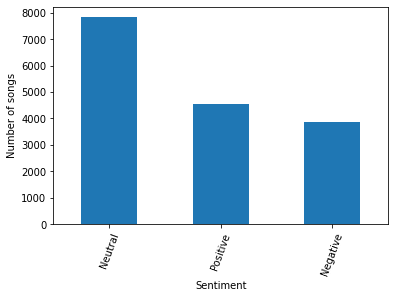

In [ ]:
df2=df2.drop_duplicates()
df2['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()

In [ ]:
# cleaning lyrics data
nltk.download('stopwords')

# removing punctuations
def remove_punct(text):
  if type(text)==str:
    no_punct="".join((c for c in text if c not in string.punctuation))
    return no_punct
  return np.nan

tokenizer=RegexpTokenizer(r'\w+')

# tokenization & lemmarization
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

def word_lem(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

# turning back to a string
def joiner(text):
    stext=" ".join([i for i in text])
    return stext

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
proj_df=pd.merge(lyrics_df1, df2, on=['aname','sname','LYRICS'], how='inner')
proj_df=proj_df.drop_duplicates(subset=['aname', 'sname'])

In [ ]:
proj_df

,aname,sname,LYRICS,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,artist,sentiment,sentiment_values
0,barbiescradle,pangarap,Minsan pa Nang ako'y napalingon Hindi ko alam ...,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,1/1/01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl,Barbie's Cradle,Neutral,1
1,steadyrollin,ifeelalive,"The trees, are singing in the wind The sky blu...",004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,11/21/17,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,hard rock,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en,Steady Rollin,Neutral,1
2,bellbivdevoe,poison,"NA Yeah, Spyderman and Freeze in full effect U...",00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,0,6oZ6brjB8x3GoeSYdwJdPc,Gold,1/1/05,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,r&b,new jack swing,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en,Bell Biv DeVoe,Neutral,1
3,ceelogreen,babyitscoldoutsidefeatchristinaaguilera,I really can't stay Baby it's cold outside I'v...,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,10/29/12,Christmas Soul,6FZYc2BvF7tColxO8PBShV,r&b,neo soul,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en,CeeLo Green,Neutral,1
4,kard,dumblitty,Get up out of my business You don't keep me fr...,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,9/22/19,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,dance pop,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en,KARD,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,boypablo,sickfeeling,"I had to catch the bus Alarm was shaking, oh A...",7zxLkZbUxITHabPzGN8Xgc,Sick Feeling,boy pablo,64,1lESM5Y1VAvrCLEgLmyfOw,Soy Pablo,10/5/18,②⓪①⑨ mixed,2bOjjgN1S3Gqd8vSMyafvJ,rock,permanent wave,0.425,0.504,9,-10.003,1,0.0314,0.02200,0.000004,0.3630,0.403,165.818,155714,en,boy pablo,Neutral,1
16272,nav,someway,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",7zxRMhXxJMQCeDDg0rKAVo,Some Way,NAV,72,4JR29CNW14Zc4Z5vflxkoJ,NAV,2/24/17,PROJECT: Contemporary,6HaCi9bqaiuSZEDfCEmwyo,r&b,urban contemporary,0.744,0.715,0,-6.103,1,0.3510,0.10100,0.000000,0.0919,0.340,154.962,179773,en,NAV,Neutral,1
16273,qulinez,risinglikethesunradiomix,"Caught up in such a head rush, wide-eyed latel...",7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,3/24/14,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.479,0.800,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en,Qulinez,Negative,0
16274,ponderosatwinsplusone,bound,"Bound, bound Bound, bound Bound to fall in lov...",7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),7/9/13,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,r&b,neo soul,0.458,0.540,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en,Ponderosa Twins Plus One,Neutral,1


In [ ]:
proj_df['lyrics']=proj_df['LYRICS'].progress_apply(lambda x:remove_punct(x))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:tokenizer.tokenize(str(x).lower()))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:word_lem(x))
proj_df['lyrics']=proj_df['lyrics'].progress_apply(lambda x:joiner(x))

100%|██████████| 16276/16276 [00:00<00:00, 36323.48it/s]


In [ ]:
proj_df=proj_df[['aname','sname','lyrics','artist','track_name','valence','sentiment','sentiment_values', 'acousticness', 'danceability', 'track_album_release_date',
       'speechiness', 'tempo', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode',
       'duration_ms', 'energy']]

proj_df=proj_df.drop_duplicates(subset=['aname', 'sname'])

In [ ]:
proj_df['final']=proj_df['artist']+' '+proj_df['track_name']+' '+proj_df['lyrics']

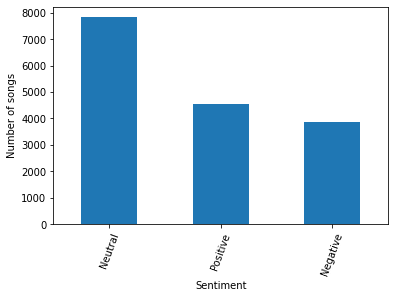

In [ ]:
proj_df['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()

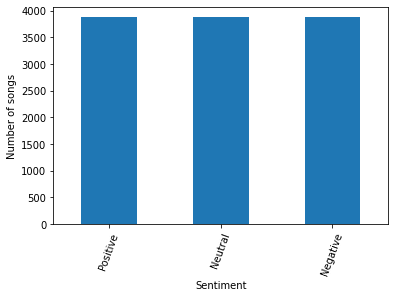

In [ ]:
neg_df = proj_df.loc[proj_df['sentiment_values'] == 0].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
neu_df = proj_df.loc[proj_df['sentiment_values'] == 1].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
pos_df = proj_df.loc[proj_df['sentiment_values'] == 2].sample(n=len(proj_df.loc[proj_df['sentiment_values'] == 0]),random_state=42)
proj_df = pd.concat([neg_df,neu_df,pos_df])
proj_df=proj_df.sample(frac=1).reset_index(drop=True)


proj_df=proj_df.drop_duplicates()
proj_df['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Sentiment")
plt.ylabel("Number of songs")
plt.show()

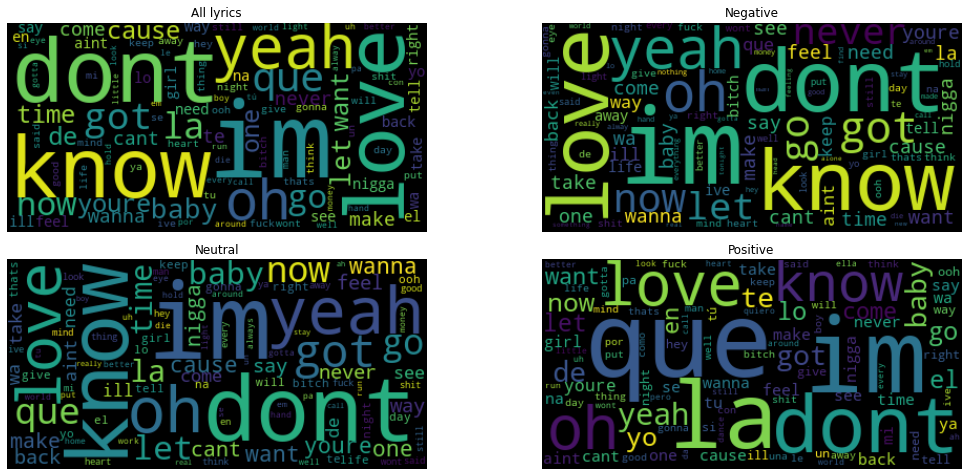

In [ ]:
# WORD CLOUD of the lyrics
plt.figure(figsize=(15,10))

plt.subplot(321)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", collocations=False).generate_from_text(' '.join(proj_df.lyrics))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('All lyrics')
plt.axis("off")

for i,s in enumerate(proj_df.sentiment.unique()):
  plt.subplot(3,2,i+2)
  wordcloud = WordCloud(max_font_size=100, max_words=100,background_color="black",collocations=False).generate_from_text(' '.join(proj_df[proj_df['sentiment']==s].lyrics))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(s)
  plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
proj_df1=proj_df.drop(columns=['sentiment','sentiment_values','valence','aname','sname','lyrics','artist','track_name'])

In [ ]:
from sklearn.model_selection import train_test_split

Xtr,Xts,Ytr,Yts=train_test_split(proj_df1,proj_df['sentiment_values'])

In [ ]:
# TF-IDF
# to vectoriza the train and test lyrics
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

tfid = TfidfVectorizer(
                    ngram_range = (1,1),
                    sublinear_tf = True,
                    max_features=40000)

train_tfid = tfid.fit_transform(Xtr['final'])
test_tfid = tfid.transform(Xts['final'])

In [ ]:
# using ML classifiers on the TF-IDF vectors only
acc={'SVC':0,'KNN':0,'SGD':0,'RF':0,'LR':0}

In [ ]:
svc = LinearSVC()
svc.fit(train_tfid, Ytr)
yhat1 = svc.predict(test_tfid)
acc['SVC']=accuracy_score(Yts, yhat1)
print('Support Vector Classification = ',acc['SVC'])

neigh = KNeighborsClassifier()
neigh.fit(train_tfid, Ytr)
yhat1 = neigh.predict(test_tfid)
acc['KNN']=accuracy_score(Yts, yhat1)
print('KNN Classification = ',acc['KNN'])

sgd = SGDClassifier().fit(train_tfid, Ytr)
yhat1 = sgd.predict(test_tfid)
acc['SGD']=accuracy_score(Yts, yhat1)
print('SGD Classifier = ',acc['SGD'])

randfor = RandomForestClassifier()
randfor.fit(train_tfid, Ytr)
yhat1=randfor.predict(test_tfid)
acc['RF']=accuracy_score(Yts, yhat1)
print('Random Forest Classifier = ',acc['RF'])

logreg = LogisticRegression(max_iter=400)
logreg.fit(train_tfid, Ytr)
yhat1=logreg.predict(test_tfid)
acc['LR']=accuracy_score(Yts, yhat1)
print('Logistic Regression = ',acc['LR'])

Support Vector Classification =  0.45304437564499483
KNN Classification =  0.41589267285861714
SGD Classifier =  0.4626762985896113
Random Forest Classifier =  0.45304437564499483
Logistic Regression =  0.4688682490540076


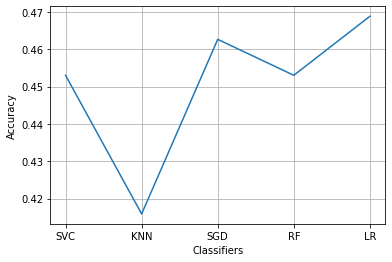

In [ ]:
plt.plot(list(acc.keys()),list(acc.values()))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
# using ML classifiers with lyrics and other parameters of a song as well
Xtr1=Xtr.drop(columns=['final'])
#Xtr1['track_album_release_date']= pd.to_datetime(Xtr1['track_album_release_date'])
Xtr1['track_album_release_date'] = Xtr1['track_album_release_date'].map(lambda x: x.replace('/', ''))
Xtr1['track_album_release_date'] = Xtr1['track_album_release_date'].map(lambda x: x.replace('-', ''))
Xts1=Xts.drop(columns=['final'])
#Xts1['track_album_release_date']= pd.to_datetime(Xts1['track_album_release_date'])
Xts1['track_album_release_date'] = Xts1['track_album_release_date'].map(lambda x: x.replace('/', ''))
Xts1['track_album_release_date'] = Xts1['track_album_release_date'].map(lambda x: x.replace('-', ''))
Xts1

,acousticness,danceability,track_album_release_date,speechiness,tempo,instrumentalness,key,liveness,loudness,mode,duration_ms,energy
454,0.001010,0.619,10212,0.0400,100.500,0.000001,0,0.3180,-6.192,1,166467,0.835
2632,0.011200,0.369,2004,0.0791,124.689,0.428000,7,0.0680,-5.693,1,280195,0.921
1298,0.148000,0.728,4816,0.0635,112.071,0.000000,1,0.0688,-3.992,1,194360,0.794
2986,0.010400,0.871,51019,0.3380,93.016,0.000000,9,0.0917,-6.775,1,179388,0.493
3118,0.000278,0.419,9401,0.1200,127.288,0.001500,7,0.1320,-3.908,0,210240,0.934
...,...,...,...,...,...,...,...,...,...,...,...,...
2372,0.289000,0.551,32498,0.0270,99.045,0.000150,10,0.0853,-9.587,0,279813,0.516
9974,0.037500,0.733,5319,0.0523,122.035,0.304000,2,0.0807,-4.955,1,161434,0.903
6538,0.105000,0.461,122807,0.0481,165.635,0.004190,11,0.0741,-6.082,0,248893,0.833
3370,0.000061,0.451,41304,0.0368,147.974,0.000000,2,0.2700,-5.550,0,194227,0.815


In [ ]:
sc=StandardScaler()
X_scaled_tr = sc.fit_transform(Xtr1)
X_scaled_t = sc.transform(Xts1)

In [ ]:
logreg = LogisticRegression(max_iter=400)
logreg.fit(X_scaled_tr, Ytr)
yhat=logreg.predict(X_scaled_t)
acc['LR']=accuracy_score(Yts, yhat)
print('Logistic Regression = ',acc['LR'])

randfor = RandomForestClassifier(n_estimators=400)
randfor.fit(X_scaled_tr, Ytr)
yhat=randfor.predict(X_scaled_t)
acc['RF']=accuracy_score(Yts, yhat)
print('Random Forest Classifier = ',acc['RF'])

svc = LinearSVC(max_iter=10000)
svc.fit(X_scaled_tr, Ytr)
yhat = svc.predict(X_scaled_t)
acc['SVC']=accuracy_score(Yts, yhat)
print('Support Vector Classification = ',acc['SVC'])

neigh = KNeighborsClassifier()
neigh.fit(X_scaled_tr, Ytr)
yhat = neigh.predict(X_scaled_t)
acc['KNN']=accuracy_score(Yts, yhat)
print('KNN Classification = ',acc['KNN'])

sgd = SGDClassifier().fit(X_scaled_tr, Ytr)
yhat = sgd.predict(X_scaled_t)
acc['SGD']=accuracy_score(Yts, yhat)
print('SGD Classifier = ',acc['SGD'])

Logistic Regression =  0.5073959408324733
Random Forest Classifier =  0.5325077399380805
Support Vector Classification =  0.49707602339181284
KNN Classification =  0.46370829033367733
SGD Classifier =  0.4877880976952184


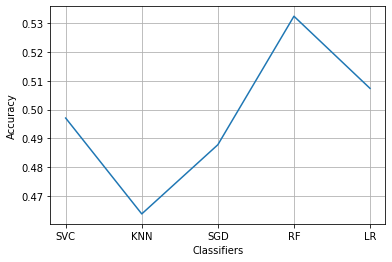

In [ ]:
plt.plot(list(acc.keys()),list(acc.values()))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid()